In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from strategy import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/strategy-Weekend-V1/../../vectorbtpro/accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under name 'vbt' 

In [4]:
df_dict = {}
coin_list = ['BTC']
for coin in coin_list:
    df_dict[coin] = get_data(coin)

In [6]:
df = df_dict['BTC']

In [5]:
# 假日時段：UTC+0 週五 22:00 - 週日 22:00

APY: 48.40 %
MDD: 10.14 %
MDD Duration 62 days 22:50:00
worst trade: -7.97 %
2022-06-19 09:15:00 ~ 2022-06-19 22:00:00
avg holding days: 0.45 days
--------------------------------------------
PF: 1.85
Sharpe Ratio: 2.32
Calmar Ratio: 4.05
Sortino Ratio: 3.29
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.24 %
Total Time Exposure : 24.66 %
Total Trades: 371
Win Rate: 74.12 %
--------------------------------------------
PF * Win Rate: 1.372


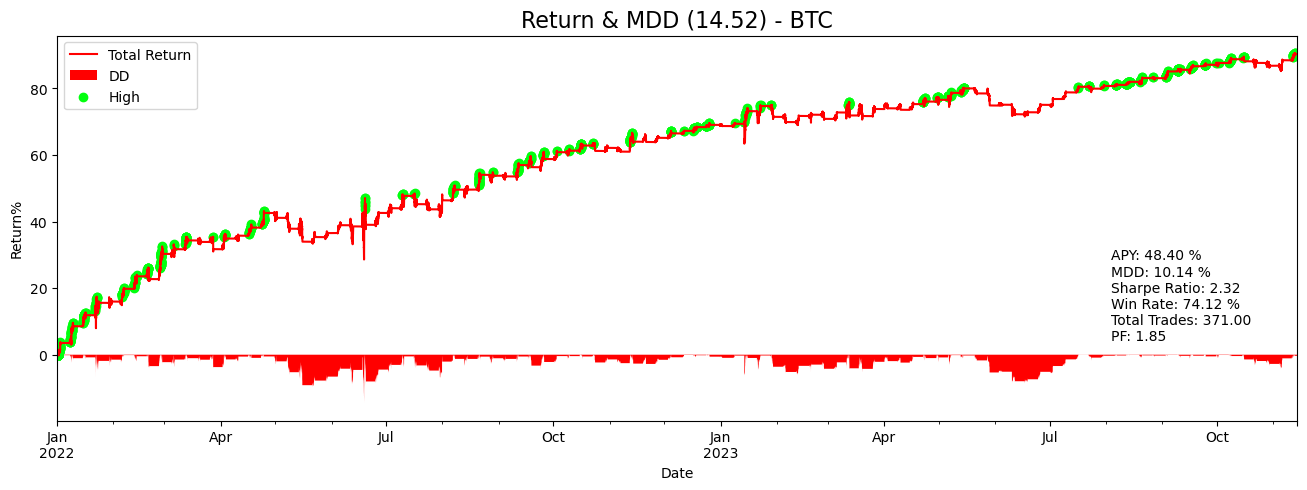

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-13 23:55:00
 Period                                682 days 00:00:00
 Start Value                                     10000.0
 Min Value                                   9976.061379
 Max Value                                  19063.821837
 End Value                                  19030.660301
 Total Return [%]                              90.306603
 Benchmark Return [%]                         -21.087603
 Total Time Exposure [%]                        24.65736
 Max Gross Exposure [%]                       100.419795
 Max Drawdown [%]                              10.142417
 Max Drawdown Duration                  62 days 22:50:00
 Total Orders                                        469
 Total Fees Paid                             2225.790732
 Total Trades                                        371
 Win Rate [%]                                  74.123989
 Best Trade [%]         

In [5]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
params = {'window': 42}
config = {'freq':'5min', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = get_data(coin)
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
analyze.show_pf_analysis(params, side, coin, axv_index=[])

In [6]:
start= '2022-01-01'
end ='2023-09-27'

params={
   'window': [12*1, 12*24, 3],
    }
    
config = {'freq':'5min','fee': 0.0003}
symbol_list = ['BTC']#,'ETH','LTC','XRP','BCH','AAVE']
sample_sets = [[start,end],['2023-01-01',end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

# multi_test.run(optimize=True,rolling=False,side_list=['L/S','both'],sep='2023-03-01')

======================= BTC BOTH Optimize Test =======================
Optimization trails: 92


100%|██████████| 92/92 [00:12<00:00,  7.38it/s]


Optimization time: 12.46 sec
---------- BTC BOTH ----------
{'window': 42}
APY: 56.81 %
MDD: 9.44 %
MDD Duration 54 days 22:15:00
worst trade: -5.15 %
2022-05-15 06:50:00 ~ 2022-05-15 22:00:00
avg holding days: 0.26 days
--------------------------------------------
PF: 1.75
Sharpe Ratio: 2.59
Calmar Ratio: 5.12
Sortino Ratio: 3.65
Omega Ratio: 1.06
--------------------------------------------
Expectancy : 0.15 %
Total Time Exposure : 27.13 %
Total Trades: 662
Win Rate: 72.21 %
--------------------------------------------
PF * Win Rate: 1.267


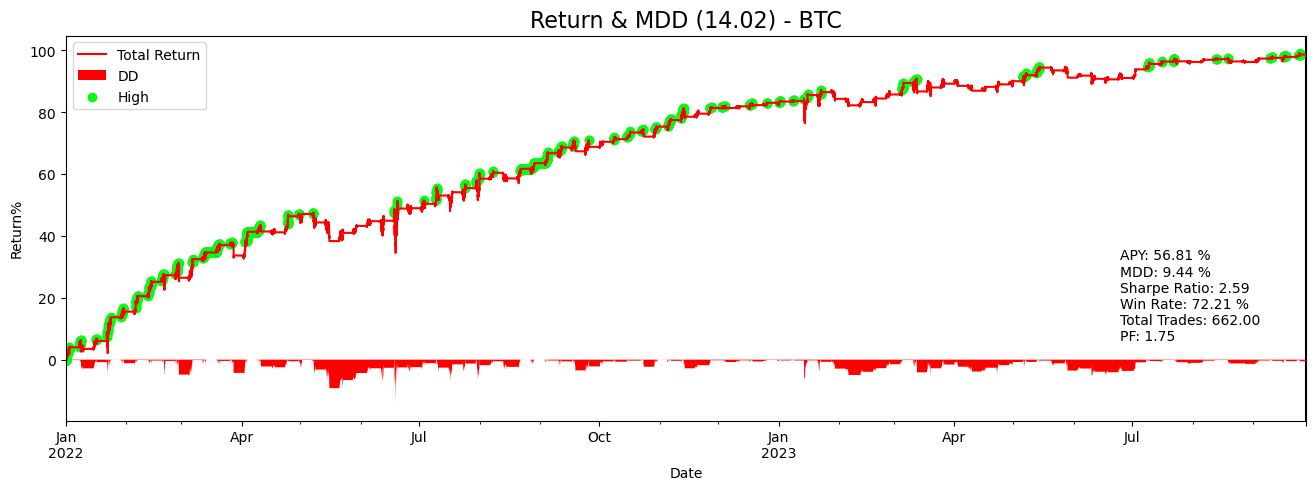

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     33.69 | 5058.04 | -1689.37 |       2.99 |   81.05 |         95 |
| 2022-06    |     15.3  | 4777.38 | -3246.92 |       1.47 |   70.33 |         91 |
| 2022-09    |     19.84 | 4353.42 | -2369.19 |       1.84 |   71.74 |         92 |
| 2022-12    |     13.87 | 2406.22 | -1019.46 |       2.36 |   70.1  |         97 |
| 2023-03    |      6.56 | 2928.71 | -2272.96 |       1.29 |   75    |         88 |
| 2023-06    |      1.85 | 2110.09 | -1925.24 |       1.1  |   67.39 |         92 |
| 2023-09    |      7.56 | 1314.58 |  -558.26 |       2.35 |   70.09 |        107 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= BTC BOTH Optimize Test =======================
Optimization trails: 9

100%|██████████| 92/92 [00:09<00:00,  9.58it/s]


Optimization time: 9.61 sec
---------- BTC BOTH ----------
{'window': 111}
APY: 30.30 %
MDD: 7.68 %
MDD Duration 62 days 23:05:00
worst trade: -4.69 %
2023-05-27 18:30:00 ~ 2023-05-28 22:00:00
avg holding days: 0.51 days
--------------------------------------------
PF: 1.69
Sharpe Ratio: 1.79
Calmar Ratio: 4.08
Sortino Ratio: 2.59
Omega Ratio: 1.04
--------------------------------------------
Expectancy : 0.18 %
Total Time Exposure : 22.68 %
Total Trades: 121
Win Rate: 71.90 %
--------------------------------------------
PF * Win Rate: 1.216


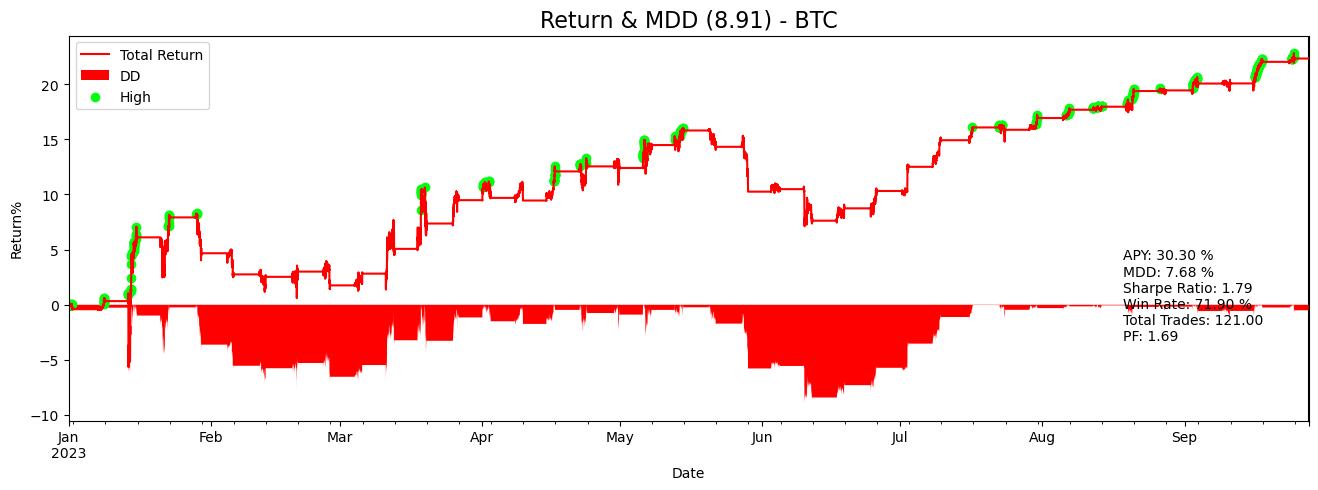

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2023-03    |      9.55 | 2676.1  | -1727.48 |       1.55 |   63.16 |         38 |
| 2023-06    |      0.83 | 1457.99 | -1374.89 |       1.06 |   66.67 |         36 |
| 2023-09    |     12.01 | 1331.7  |  -130.54 |      10.2  |   82.98 |         47 |
+------------+-----------+---------+----------+------------+---------+------------+


{'BTC': {'both': {0: {'window': 42.0}, 1: {'window': 111.0}}}}

In [8]:
all_params = multi_test.multi_params(['BTC'],sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
multi_test.save_version_result(all_params,value_df,trades,1)
all_params